# Walmart Sales Forecasting Analysis using TS & DL
## Hengly aun : Micro-Projects:

# #4 : 26 August 2023

https://github.com/aunhengly/ana500-microProject/blob/main/Hengly-MicroProject.ipynb

# Problem Statement 
- Background:
The dataset contains information about the sales data of Walmart for different stores and departments, including the date and whether it's a holiday or not. The objective is to build predictive models that can forecast future sales, considering the temporal nature of the data.


- Objective(s):

  - Develop a time series analysis to understand the patterns and trends in the sales data over time.
  - Create a predictive model using linear regression to predict weekly sales based on store, department, and holiday information.
  - Apply time series forecasting techniques to predict future sales for each store and department.
  - Explore the potential of deep learning models, specifically LSTM, to forecast sales and compare their performance with traditional time series models.

# Data Dictionary:

This is the historical training data, which covers 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

- Store: Represents the ID or number of a specific store.
- Dept: Represents the department within a store.
- Date: The date of the recorded data.
- Weekly_Sales: The sales value for that particular week.
- IsHoliday: Indicates whether the week includes a holiday (True or False).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

DATA = Path('/Users/henglyaun/ANA500/Data/Walmart')
dfraw = pd.read_csv(DATA / 'train.csv')

#Source: https://www.kaggle.com/code/arunkumar1809/walmart-sales-advanced-analysis-and-prediction/notebook

In [9]:
# Quick overview of the data
print("Datase shape:", dfraw.shape,"\n")
print('The first few lines of the data:\n ', dfraw.head())
print('\nThe last few lines of the data:\n ', dfraw.tail())

Datase shape: (421570, 5) 

The first few lines of the data:
     Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

The last few lines of the data:
          Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False


In [10]:
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [11]:
# Check for missing values
missing_values = dfraw.isnull().sum()
percentage_missing = (missing_values / len(dfraw)) * 100
print(pd.DataFrame({'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

              missing  pc_missing
Store               0         0.0
Dept                0         0.0
Date                0         0.0
Weekly_Sales        0         0.0
IsHoliday           0         0.0


In [16]:
display(dfraw.describe(include='all'))

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


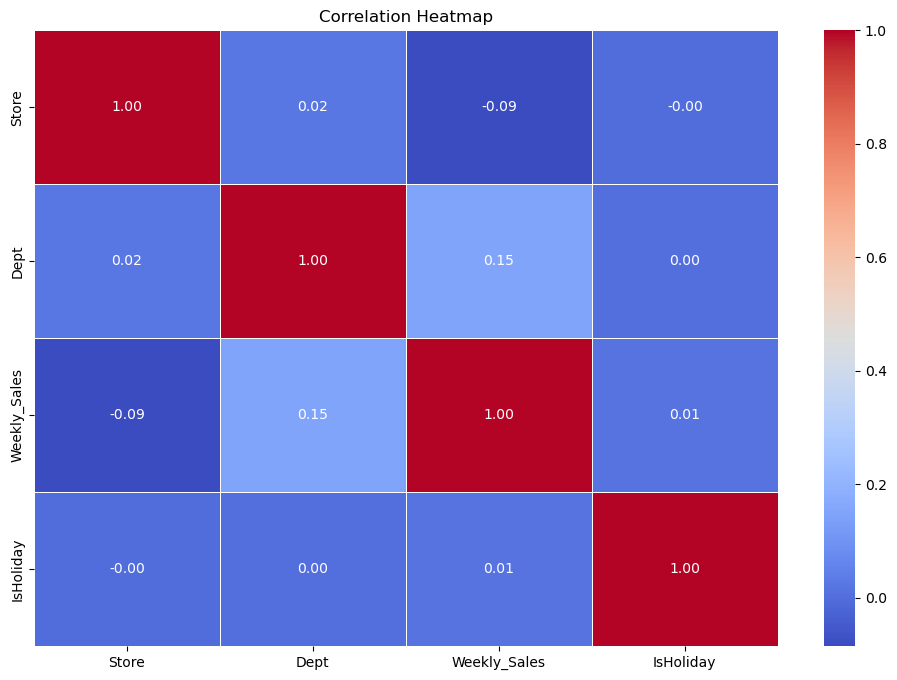

In [36]:
data= dfraw.drop('Date', axis=1)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix as numerical values
print(correlation_matrix.round(2))

              Store  Dept  Weekly_Sales  IsHoliday
Store          1.00  0.02         -0.09      -0.00
Dept           0.02  1.00          0.15       0.00
Weekly_Sales  -0.09  0.15          1.00       0.01
IsHoliday     -0.00  0.00          0.01       1.00


The interpretation of the correlations of the matrix:

- Store vs. Dept: The correlation coefficient is very close to 0 (0.02), indicating a very weak positive correlation between the Store and Dept variables. This suggests that there's almost no linear relationship between the store number and department number.

- Store vs. Weekly_Sales: The correlation coefficient is -0.09, indicating a weak negative correlation between the Store and Weekly_Sales variables. This suggests that there might be a slight tendency that as the store number increases, the weekly sales might decrease slightly. However, the correlation is weak, so this relationship is not very significant.

- Store vs. IsHoliday: The correlation coefficient is very close to 0 (-0.00), indicating essentially no correlation between the Store and IsHoliday variables. This means that the store number and whether a week is a holiday or not are not correlated.

- Dept vs. Weekly_Sales: The correlation coefficient is 0.15, indicating a weak positive correlation between the Dept and Weekly_Sales variables. This suggests that there might be a slight tendency that as the department number increases, the weekly sales also increase slightly. However, this correlation is again relatively weak.

- Dept vs. IsHoliday: The correlation coefficient is very close to 0 (0.00), indicating no correlation between the Dept and IsHoliday variables. This means that the department number and whether a week is a holiday or not are not correlated.

- Weekly_Sales vs. IsHoliday: The correlation coefficient is 0.01, indicating a very weak positive correlation between the Weekly_Sales and IsHoliday variables. This suggests that there's almost no relationship between weekly sales and whether a week is a holiday or not.

In summary, based on the correlation coefficients, there seem to be very weak or no significant linear relationships between these variables in the dataset.

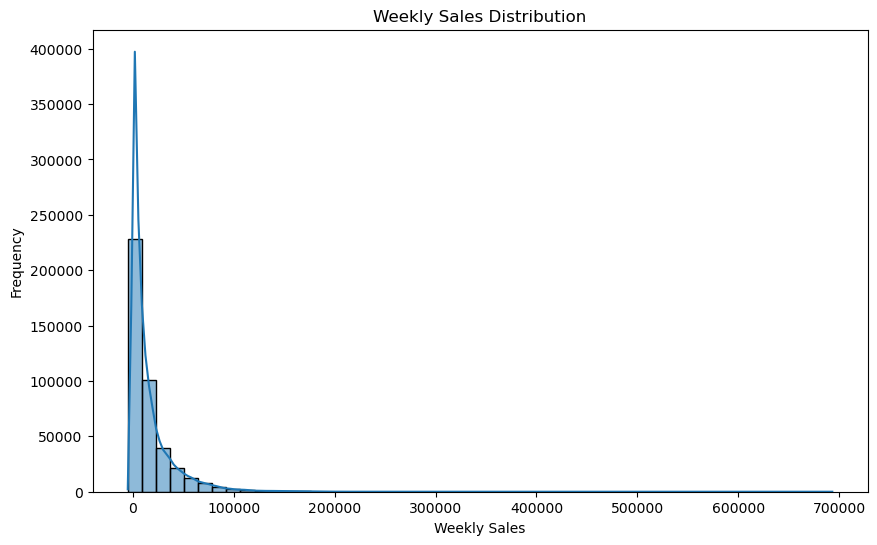

In [33]:
# Visualize sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

The graph shows that the weekly sales are normally distributed, with the highest frequency of sales between 200,000 and 300,000. There is a long tail to the right of the distribution, indicating that there are a few stores with very high weekly sales.

The KDE curve shows that the probability of a store having weekly sales of less than 100,000 is very low. The probability of a store having weekly sales of more than 500,000 is also very low.

Overall, the graph shows that the weekly sales for this store are normally distributed, with most stores having weekly sales between 200,000 and 300,000. There are a few stores with very high weekly sales, but these are outliers.

Mean Squared Error: 505771167.0


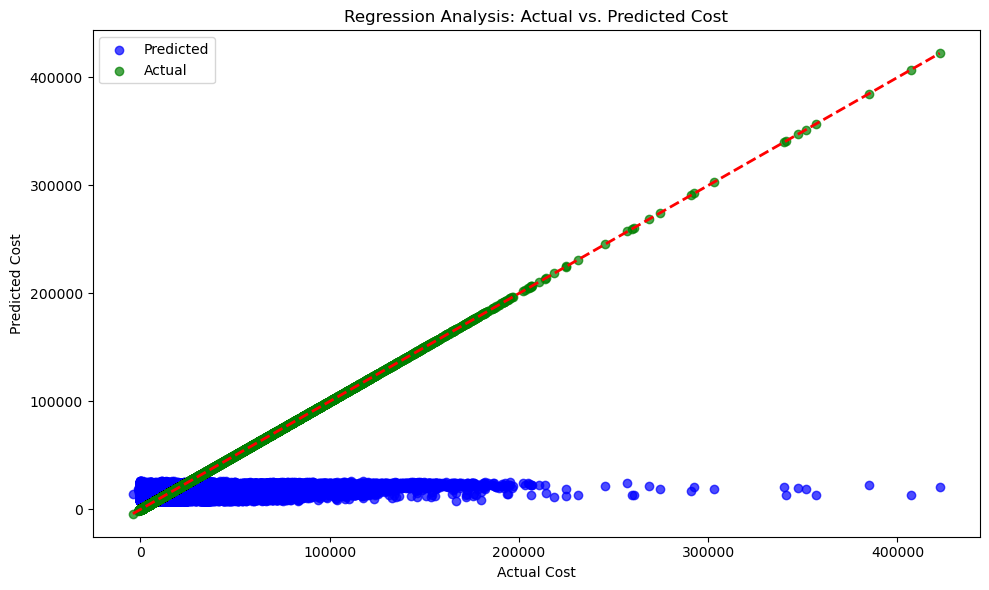

In [40]:
# Prepare features and target
X = data[['Store', 'Dept', 'IsHoliday']]
y = data['Weekly_Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse.round(2)}')

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)  # Blue for predicted values
plt.scatter(y_test, y_test, color='green', label='Actual', alpha=0.7)     # Green for actual values

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Regression Analysis: Actual vs. Predicted Cost')
plt.tight_layout()
plt.legend()
plt.show()

- The MSE is a measure of how well the linear regression model's predictions align with the actual values in the testing set.The computed Mean Squared Error is approximately 505,771,167.0. This value represents the average squared difference between the predicted 'Weekly_Sales' values and the actual 'Weekly_Sales' values in the testing set.

- A higher MSE indicates that the model's predictions have larger errors compared to the actual values. In this case, the relatively high MSE suggests that the linear regression model might not be capturing the complex relationships within the data very accurately.

In summary, the result indicates that the linear regression model's predictions have room for improvement in accurately estimating the 'Weekly_Sales' values.